In [37]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand
from scipy.stats import norm

In [63]:
x_train = np.random.uniform(0, 1, 10)
x_train = np.array(sorted(x_train))
x = np.random.uniform(0, 1, 100)
x = np.array(sorted(x))
y_train = np.sin(2 * np.pi * x_train) + rand.randn(10) * 0.5
target = np.sin(2 * np.pi * x)

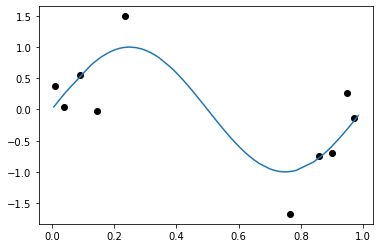

In [64]:
plt.plot(x,target)
plt.scatter(x_train,y_train, color='black') 
plt.show()

In [68]:
def cal(x_test, x_train, y_train, sig):
    norm_vals = norm.pdf(x_test - x_train.reshape(10,1), loc=0, scale = sig).T
    norm_vals = norm_vals/(norm_vals.sum(axis = 1,keepdims=True))

    expectation = (norm_vals * y_train.reshape(1,10)).sum(axis = 1)
    cond_var = np.sqrt(sig **2 +  (norm_vals * y_train.reshape(1,10) **2).sum(axis = 1) - expectation**2)
    return expectation, cond_var

In [69]:
x_test = np.linspace(0, 1, 100) 
sigma_list = [0.01*i for i in range(1, 11)]

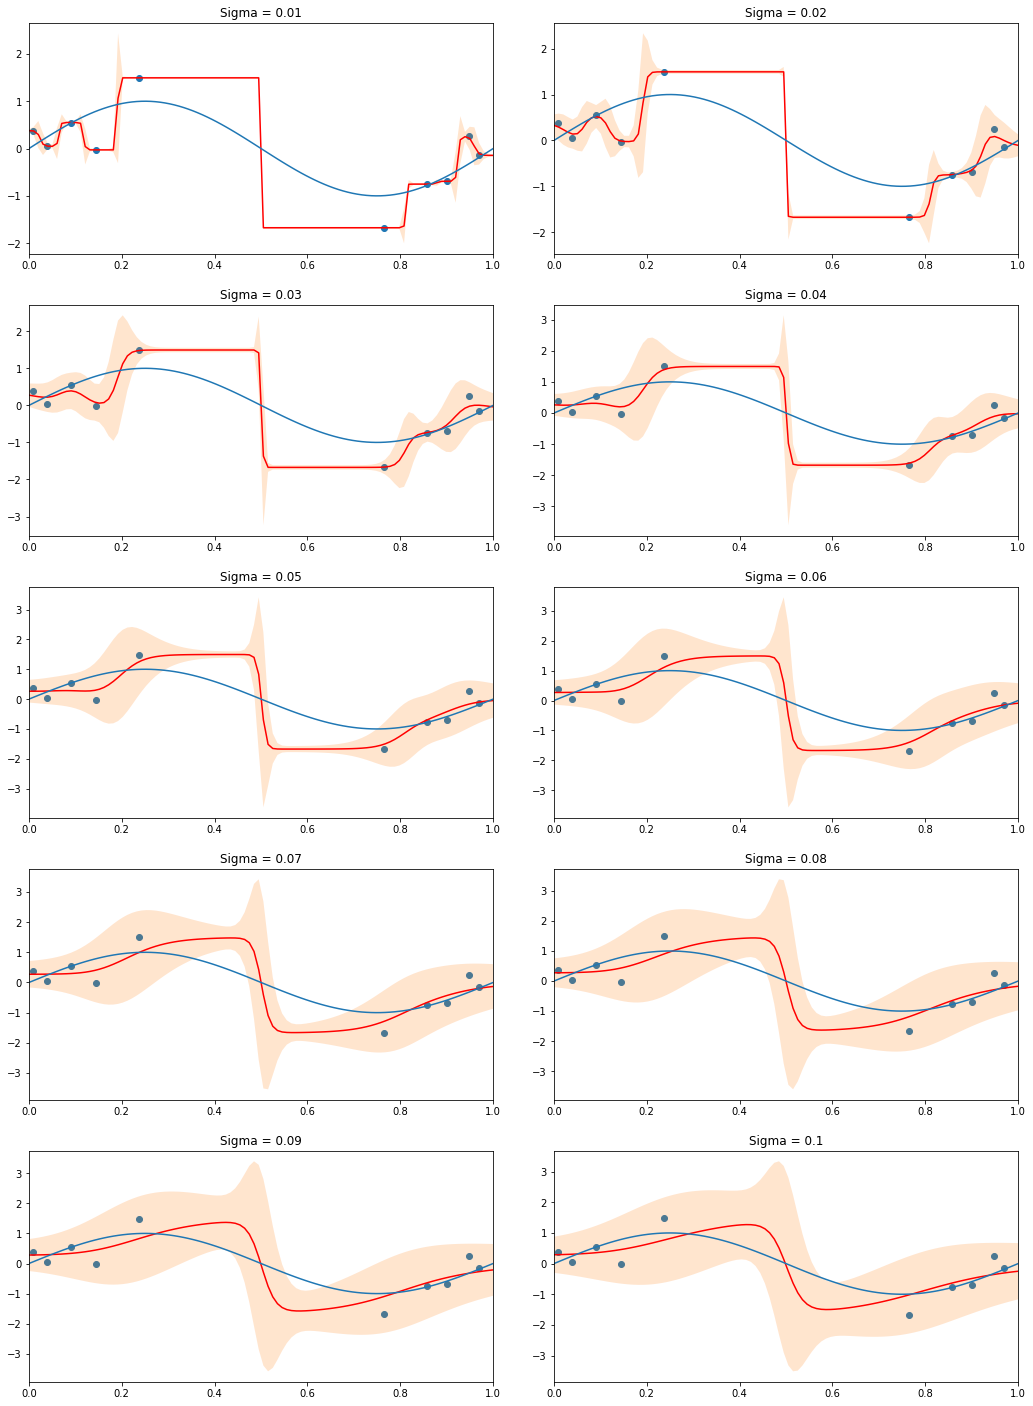

In [70]:
fig, axes = plt.subplots(5, 2, figsize=(15,20))
fig.tight_layout(pad=3)
for sigma, axis in zip(sigma_list, axes.ravel()):
    Exp,var = cal(x_test, x_train, y_train, sigma)
    axis.scatter(x_train, y_train)
    axis.plot(x_test, Exp, color='red')
    axis.fill_between(x_test, Exp - 2*var, Exp + 2*var, alpha = 0.2)
    axis.plot(x_test,np.sin(2 * np.pi * x_test))
    axis.set_title("Sigma = " f"{sigma}")
    axis.set_xlim(0, 1);